# CASE STUDY ON ANOVA

XYZ Company has offices in four different zones. The company wishes to investigate the following :
    
1. The mean sales generated by each zone.
2. Total sales generated by all the zones for each month.
3. Check whether all the zones generate the same amount of sales.

Help the company to carry out their study with the help of data provided.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Sales_data_zone_wise.csv')
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [3]:
df.shape

(29, 5)

In [4]:
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

**Observations:**
* Data set have 29 entries and is the sales of 29 months.
* There are no null values
* Features include sales of 4 different Zones A,B,C,D.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


### 1.The mean sales generated by each zone.

In [6]:
z_mean = df.mean().round(2)
z_mean

Zone - A    1540493.14
Zone - B    1755559.59
Zone - C    1772871.03
Zone - D    1842926.76
dtype: float64

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

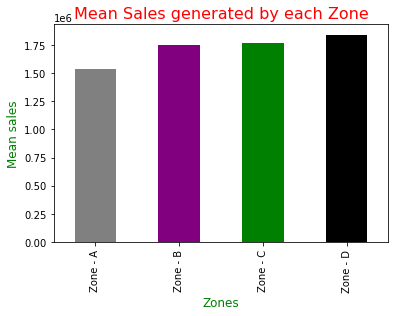

In [7]:
z_mean.plot.bar(color =['grey', 'purple', 'green', 'black'],width = 0.5)
plt.title('Mean Sales generated by each Zone',c='r',fontsize=16)
plt.xlabel('Zones',c='g',fontsize=12)
plt.ylabel('Mean sales',c='g',fontsize=12)
plt

**Inference:**
* Zone D has the highest mean sale.
* Lowest mean sale value for Zone A.


### 2.Total sales generated by all the zones for each month

In [8]:
df['Total Sales']=df.sum(axis=1).to_frame()
Total=df[['Month','Total Sales']]
Total.head()

,Month,Total Sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328


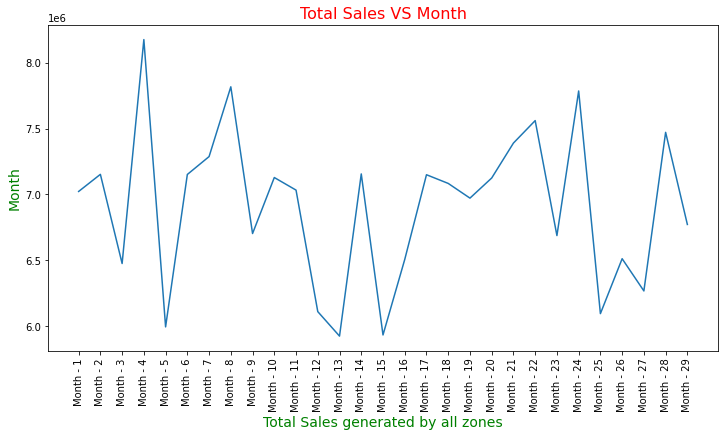

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Month'],df['Total Sales'])
plt.xticks(rotation=90)
plt.title('Total Sales VS Month',c='r',fontsize=16)
plt.ylabel('Month',c='g',fontsize=14,rotation=90)
plt.xlabel('Total Sales generated by all zones',c='g',fontsize=14)

           

plt.show()

**Findings:**
* Month 4 has the greatest sale.
* Month 13 has the least sales.

### 3.Check whether all the zones generate the same amount of sales.

* In this dataset, we have more than one independant variables to analyse and compare so we can go with ANOVA test.


**Null Hypothesis, H0**: All the zone generate the same amount of sales

**Alternate Hypothesis, Ha**: All the zone generate different amount of sales

set Level Of Significane alpha as 0.05

In [11]:
s,p=f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
print('p-value:',round(p,4))

p-value: 0.0012


In [14]:
if p<0.05: 
    print('All the zones generate different amount of sales')
else:
    print(' All the zones generate same amount of sales')

All the zones generate different amount of sales


**Inference**
* Since P-Value (0.0012) < 0.05,  which shows that we can reject the null hypothesis
* As p-vslue is less than 0.05 we accept Alternative Hypothesis and says like , ***All the zone generate different amount of sales.***